# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
import logging
logging.basicConfig(level=logging.DEBUG)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [7]:
cities

['ribeira grande',
 'hamilton',
 'sur',
 'roma',
 'barrow',
 'lompoc',
 'butaritari',
 'tevriz',
 'bethel',
 'mendi',
 'mataura',
 'kodiak',
 'attawapiskat',
 'redmond',
 'qaanaaq',
 'kushmurun',
 'sao luis do quitunde',
 'hobart',
 'busselton',
 'cardston',
 'albany',
 'hadzici',
 'kvitok',
 'kapaa',
 'luderitz',
 'yar-sale',
 'mar del plata',
 'nelson bay',
 'quezada',
 'ayorou',
 'long',
 'nanortalik',
 'krasnoselkup',
 'eureka',
 'yellowknife',
 'torbay',
 'mlonggo',
 'miandrivazo',
 'puerto ayora',
 'vryburg',
 'new norfolk',
 'coquimbo',
 'grand centre',
 'alotau',
 'chokurdakh',
 'tautira',
 'atuona',
 'klaksvik',
 'huarmey',
 'viransehir',
 'bambous virieux',
 'xai-xai',
 'mahebourg',
 'manzil tamim',
 'fortuna',
 'ponta do sol',
 'punta arenas',
 'paulista',
 'pevek',
 'rikitea',
 'belushya guba',
 'illoqqortoormiut',
 'arraial do cabo',
 'pangnirtung',
 'palabuhanratu',
 'tiksi',
 'portland',
 'taolanaro',
 'bredasdorp',
 'nizhneyansk',
 'jamestown',
 'mzimba',
 'katsuura',
 

In [8]:
#save it into csv

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&"

city = "beibei"
query_url = url + "q=" + city + "&appid=" + weather_api_key
response = requests.get(query_url).json()
response

In [10]:
response["coord"]["lat"]

29.8256

In [11]:
weather_dict = {
'Lat':[],
'Lng':[],
'MaxTemp':[],
'Humidity':[],
'Cloudiness':[],
'WindSpeed':[],
'Country':[],
'Date':[]
}

print("Beginning Data Retrieval")
print("-----------------------------")

Record = 0
Set = 1
for c in cities:
   
    Record = Record + 1
    if Record % 50 == 0 :
        Record = 0
        Set = Set + 1
        
    try:
        query_url = url + "q=" + c + "&appid=" + weather_api_key
        response = requests.get(query_url).json()
        print(f"Processing Record {Record}  of Set {Set} | {c}.")

        weather_dict["Lat"].append(response["coord"]["lat"])
        weather_dict["Lng"].append(response["coord"]["lon"])
        weather_dict["MaxTemp"].append(response["main"]["temp_max"])
        weather_dict["Humidity"].append(response["main"]["humidity"])
        weather_dict["Cloudiness"].append(response["clouds"]["all"])
        weather_dict["WindSpeed"].append(response["wind"]["speed"])
        weather_dict["Country"].append(response["sys"]["country"])
        weather_dict["Date"].append(response["dt"])
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")        
    



DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Beginning Data Retrieval
-----------------------------


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ribeira%20grande&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 1 | ribeira grande.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hamilton&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 1 | hamilton.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sur&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 1 | sur.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=roma&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 1 | roma.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=barrow&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 1 | barrow.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lompoc&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 1 | lompoc.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=butaritari&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 1 | butaritari.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tevriz&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 1 | tevriz.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bethel&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 1 | bethel.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mendi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 1 | mendi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mataura&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 1 | mataura.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kodiak&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 1 | kodiak.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=attawapiskat&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 1 | attawapiskat.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=redmond&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 510
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 1 | redmond.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=qaanaaq&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 1 | qaanaaq.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kushmurun&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 1 | kushmurun.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sao%20luis%20do%20quitunde&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 1 | sao luis do quitunde.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hobart&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 1 | hobart.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=busselton&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 1 | busselton.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cardston&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 509
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 1 | cardston.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=albany&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 1 | albany.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hadzici&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 1 | hadzici.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kvitok&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 504
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 1 | kvitok.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kapaa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 1 | kapaa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=luderitz&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 1 | luderitz.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yar-sale&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 515
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 1 | yar-sale.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mar%20del%20plata&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 1 | mar del plata.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nelson%20bay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 549
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 1 | nelson bay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=quezada&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 1 | quezada.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ayorou&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 1 | ayorou.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=long&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 1 | long.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nanortalik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 1 | nanortalik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=krasnoselkup&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 1 | krasnoselkup.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=eureka&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 454
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 1 | eureka.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yellowknife&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 1 | yellowknife.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=torbay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 1 | torbay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mlonggo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 1 | mlonggo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=miandrivazo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 506
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 1 | miandrivazo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=puerto%20ayora&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 1 | puerto ayora.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vryburg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 1 | vryburg.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=new%20norfolk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 1 | new norfolk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=coquimbo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 1 | coquimbo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=grand%20centre&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 1 | grand centre.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=alotau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 1 | alotau.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chokurdakh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 1 | chokurdakh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tautira&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 1 | tautira.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=atuona&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 1 | atuona.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=klaksvik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 1 | klaksvik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=huarmey&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 504
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 1 | huarmey.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=viransehir&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 2 | viransehir.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bambous%20virieux&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 2 | bambous virieux.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=xai-xai&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 2 | xai-xai.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mahebourg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 2 | mahebourg.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=manzil%20tamim&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 2 | manzil tamim.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=fortuna&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 2 | fortuna.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ponta%20do%20sol&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 2 | ponta do sol.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=punta%20arenas&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 2 | punta arenas.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=paulista&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 2 | paulista.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pevek&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 2 | pevek.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rikitea&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 2 | rikitea.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=belushya%20guba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 2 | belushya guba.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=illoqqortoormiut&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 2 | illoqqortoormiut.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=arraial%20do%20cabo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 2 | arraial do cabo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pangnirtung&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 2 | pangnirtung.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=palabuhanratu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 2 | palabuhanratu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tiksi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 2 | tiksi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=portland&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 2 | portland.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=taolanaro&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 2 | taolanaro.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bredasdorp&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 2 | bredasdorp.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nizhneyansk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 2 | nizhneyansk.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=jamestown&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 2 | jamestown.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mzimba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 2 | mzimba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=katsuura&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 2 | katsuura.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=georgetown&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 2 | georgetown.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ushuaia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 2 | ushuaia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=iqaluit&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 453
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 2 | iqaluit.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kavieng&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 507
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 2 | kavieng.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=izhevskoye&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 503
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 2 | izhevskoye.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=plaster%20rock&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 2 | plaster rock.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bismil&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 2 | bismil.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bengkulu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 2 | bengkulu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=buala&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 508
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 2 | buala.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pasni&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 2 | pasni.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=biddeford&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 2 | biddeford.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hilo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 2 | hilo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hare%20bay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 2 | hare bay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=umzimvubu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 2 | umzimvubu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=popondetta&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 2 | popondetta.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20alfred&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 2 | port alfred.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bluff&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 2 | bluff.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=san%20nicolas&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 2 | san nicolas.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nguiu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 2 | nguiu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=henties%20bay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 2 | henties bay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=changping&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 457
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 2 | changping.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sayyan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 2 | sayyan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=samusu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 2 | samusu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cape%20town&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 2 | cape town.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bonthe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 2 | bonthe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pimentel&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 2 | pimentel.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vila&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 3 | vila.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cherskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 3 | cherskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=norman%20wells&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 3 | norman wells.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=clyde%20river&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 3 | clyde river.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ahipara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 3 | ahipara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=barentsburg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 3 | barentsburg.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=carnarvon&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 3 | carnarvon.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=moyale&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 3 | moyale.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=myitkyina&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 3 | myitkyina.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tuktoyaktuk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 3 | tuktoyaktuk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nsanje&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 3 | nsanje.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=atlantic%20beach&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 3 | atlantic beach.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=humaita&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 3 | humaita.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=faanui&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 3 | faanui.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20macquarie&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 3 | port macquarie.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=severo-kurilsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 521
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 3 | severo-kurilsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=belmonte&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 3 | belmonte.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=upernavik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 504
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 3 | upernavik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=debre%20tabor&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 3 | debre tabor.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=alofi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 3 | alofi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=brooks&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 3 | brooks.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=provideniya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 3 | provideniya.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=guaruja&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 3 | guaruja.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kaitangata&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 3 | kaitangata.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=verkhnevilyuysk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 3 | verkhnevilyuysk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tumannyy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 3 | tumannyy.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pisco&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 3 | pisco.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mnogovershinnyy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 3 | mnogovershinnyy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=castro&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 3 | castro.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ambon&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 3 | ambon.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=smidovich&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 3 | smidovich.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aksehir&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 3 | aksehir.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=qandala&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 3 | qandala.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=harper&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 3 | harper.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=coldwater&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 3 | coldwater.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nogliki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 3 | nogliki.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tateyama&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 3 | tateyama.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20elizabeth&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 3 | port elizabeth.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tabas&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 3 | tabas.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=touros&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 3 | touros.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=guerrero%20negro&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 3 | guerrero negro.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ulaangom&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 3 | ulaangom.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sao%20joao%20da%20barra&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 3 | sao joao da barra.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=laguna&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 3 | laguna.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tura&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 3 | tura.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=airai&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 3 | airai.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=southbridge&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 3 | southbridge.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saint-philippe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 3 | saint-philippe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chuy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 3 | chuy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=grindavik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 3 | grindavik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=onega&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 4 | onega.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kalmunai&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 4 | kalmunai.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=riviere-au-renard&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 4 | riviere-au-renard.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dikson&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 4 | dikson.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=oyama&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 4 | oyama.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cidreira&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 4 | cidreira.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=naze&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 4 | naze.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=leh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 4 | leh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=east%20london&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 4 | east london.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=avarua&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 4 | avarua.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tommot&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 4 | tommot.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=eyl&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 4 | eyl.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yarada&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 451
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 4 | yarada.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tarudant&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 4 | tarudant.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lasa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 456
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 4 | lasa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=los%20llanos%20de%20aridane&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 4 | los llanos de aridane.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=xichang&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 4 | xichang.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=alice%20springs&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 4 | alice springs.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nikolskoye&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 4 | nikolskoye.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=holme&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 4 | holme.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=benghazi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 4 | benghazi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ewa%20beach&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 4 | ewa beach.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=gamboma&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 4 | gamboma.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sao%20felix%20do%20xingu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 4 | sao felix do xingu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=victoria&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 4 | victoria.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kandi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 4 | kandi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=obidos&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 4 | obidos.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vaini&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 4 | vaini.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=surazh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 4 | surazh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=szubin&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 455
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 4 | szubin.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ilinsko-podomskoye&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 4 | ilinsko-podomskoye.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kruisfontein&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 4 | kruisfontein.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chegdomyn&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 4 | chegdomyn.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hermanus&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 4 | hermanus.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=russell&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 4 | russell.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=blythe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 4 | blythe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mykolayivka&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 4 | mykolayivka.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mareeba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 4 | mareeba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dolbeau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 4 | dolbeau.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hithadhoo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 4 | hithadhoo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hauterive&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 4 | hauterive.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vestmanna&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 4 | vestmanna.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=barcelos&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 4 | barcelos.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lidkoping&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 4 | lidkoping.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mackay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 4 | mackay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tabou&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 4 | tabou.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=soligalich&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 4 | soligalich.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=isangel&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 4 | isangel.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tiznit&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 4 | tiznit.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ilulissat&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 4 | ilulissat.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=burica&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 5 | burica.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mocambique&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 5 | mocambique.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cayenne&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 5 | cayenne.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=paris&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 5 | paris.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dingle&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 5 | dingle.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vila%20velha&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 5 | vila velha.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nuevo%20casas%20grandes&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 5 | nuevo casas grandes.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=marcona&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 5 | marcona.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lavrentiya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 5 | lavrentiya.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bosaso&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 5 | bosaso.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sabang&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 5 | sabang.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=taoudenni&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 5 | taoudenni.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mys%20shmidta&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 5 | mys shmidta.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kumluca&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 5 | kumluca.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mindelo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 5 | mindelo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ancud&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 5 | ancud.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=puerto%20del%20rosario&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 5 | puerto del rosario.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sompeta&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 5 | sompeta.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=necochea&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 5 | necochea.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=codrington&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 508
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 5 | codrington.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vaitupu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 5 | vaitupu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tsihombe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 5 | tsihombe.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mahibadhoo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 5 | mahibadhoo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=maniitsoq&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 5 | maniitsoq.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=leningradskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 510
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 5 | leningradskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vanimo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 5 | vanimo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=puerto%20escondido&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 5 | puerto escondido.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bolungarvik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 5 | bolungarvik.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dalaba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 5 | dalaba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=esperance&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 5 | esperance.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=alvand&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 5 | alvand.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mount%20gambier&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 5 | mount gambier.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bandarbeyla&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 5 | bandarbeyla.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=betul&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 5 | betul.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=moerai&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 5 | moerai.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=okha&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 5 | okha.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saskylakh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 5 | saskylakh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=katherine&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 5 | katherine.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=abu%20dhabi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 5 | abu dhabi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=raudeberg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 5 | raudeberg.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=honiara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 5 | honiara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=caruray&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 5 | caruray.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=morgan%20city&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 5 | morgan city.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=amderma&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 5 | amderma.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=westport&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 5 | westport.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yushu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 5 | yushu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kokkola&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 5 | kokkola.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=taonan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 5 | taonan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kpandu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 5 | kpandu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mamontovo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 5 | mamontovo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lebu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 6 | lebu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=puerto%20leguizamo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 503
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 6 | puerto leguizamo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tighina&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 6 | tighina.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tukrah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 6 | tukrah.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=feijo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 6 | feijo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hami&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 6 | hami.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nerchinskiy%20zavod&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 510
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 6 | nerchinskiy zavod.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nhulunbuy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 6 | nhulunbuy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=karakose&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 6 | karakose.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nouadhibou&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 6 | nouadhibou.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=makokou&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 6 | makokou.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=margate&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 456
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 6 | margate.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sentyabrskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 6 | sentyabrskiy.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=richards%20bay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 6 | richards bay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=wanlaweyn&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 6 | wanlaweyn.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=boa%20vista&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 6 | boa vista.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=itarema&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 6 | itarema.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=robertson&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 6 | robertson.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=salalah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 6 | salalah.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sitka&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 603
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 6 | sitka.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=iranshahr&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 6 | iranshahr.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ponta%20delgada&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 6 | ponta delgada.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=grand%20river%20south%20east&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 6 | grand river south east.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bukama&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 6 | bukama.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=neuquen&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 6 | neuquen.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=catamarca&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 514
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 6 | catamarca.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saravan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 6 | saravan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=shilka&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 6 | shilka.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=shubarshi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 6 | shubarshi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kloulklubed&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 6 | kloulklubed.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vao&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 6 | vao.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=oktyabrskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 6 | oktyabrskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=teguldet&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 6 | teguldet.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=linchuan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 6 | linchuan.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nanakuli&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 6 | nanakuli.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=at-bashi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 6 | at-bashi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=qaqortoq&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 6 | qaqortoq.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chapais&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 6 | chapais.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nioro&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 6 | nioro.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kaohsiung&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 6 | kaohsiung.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=shenjiamen&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 6 | shenjiamen.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=caravelas&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 6 | caravelas.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=langsa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 6 | langsa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=samfya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 515
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 6 | samfya.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=san%20patricio&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 6 | san patricio.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sinjah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 6 | sinjah.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ouesso&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 6 | ouesso.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=marsa%20matruh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 6 | marsa matruh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hofn&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 6 | hofn.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=alta%20floresta&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 503
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 6 | alta floresta.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vieste&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 455
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 7 | vieste.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cubulco&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 507
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 7 | cubulco.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tartki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 7 | tartki.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cabatuan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 7 | cabatuan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=martapura&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 7 | martapura.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=trinidad&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 7 | trinidad.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tilichiki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 7 | tilichiki.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lagoa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 7 | lagoa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aitape&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 517
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 7 | aitape.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sistranda&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 7 | sistranda.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=skelleftea&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 7 | skelleftea.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=beruni&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 7 | beruni.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=longyearbyen&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 7 | longyearbyen.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tromso&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 7 | tromso.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=erenhot&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 7 | erenhot.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=fairbanks&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 522
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 7 | fairbanks.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pamekasan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 504
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 7 | pamekasan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vardo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 7 | vardo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=koslan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 7 | koslan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bani%20walid&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 7 | bani walid.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=denpasar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 7 | denpasar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=novyy%20urengoy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 506
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 7 | novyy urengoy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=fukue&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 7 | fukue.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tuatapere&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 7 | tuatapere.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hasaki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 7 | hasaki.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saleaula&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 7 | saleaula.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=san&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 7 | san.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=maceio&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 7 | maceio.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dhanwar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 7 | dhanwar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yulara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 457
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 7 | yulara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kalabo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 7 | kalabo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mkuranga&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 7 | mkuranga.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ocean%20city&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 7 | ocean city.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=beira&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 7 | beira.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ahumada&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 7 | ahumada.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nelson&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 7 | nelson.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=baleshwar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 7 | baleshwar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=prince%20rupert&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 7 | prince rupert.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=fort%20wellington&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 7 | fort wellington.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=alyangula&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 7 | alyangula.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saint-augustin&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 7 | saint-augustin.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kutum&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 7 | kutum.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bako&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 7 | bako.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=starychi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 457
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 7 | starychi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bungoma&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 7 | bungoma.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=patan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 459
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 7 | patan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=monrovia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 7 | monrovia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=gumdag&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 7 | gumdag.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=barranca&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 503
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 7 | barranca.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dabakala&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 7 | dabakala.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aksarka&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 8 | aksarka.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=zapote&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 8 | zapote.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=moyobamba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 8 | moyobamba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=padang&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 8 | padang.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hambantota&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 8 | hambantota.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dubti&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 8 | dubti.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bathsheba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 8 | bathsheba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=santa%20cruz&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 8 | santa cruz.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=zhangjiakou&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 8 | zhangjiakou.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=piney%20green&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 8 | piney green.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cobija&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 8 | cobija.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sucre&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 8 | sucre.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=porosozero&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 8 | porosozero.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=khor&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 8 | khor.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=agua%20dulce&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 8 | agua dulce.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vallenar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 8 | vallenar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=thompson&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 8 | thompson.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saint-pierre&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 8 | saint-pierre.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=derzhavinsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 8 | derzhavinsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bowmore&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 8 | bowmore.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=colombia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 8 | colombia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=jardim&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 8 | jardim.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=labuan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 8 | labuan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=erzin&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 8 | erzin.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kulhudhuffushi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 8 | kulhudhuffushi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port-gentil&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 8 | port-gentil.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=jiblah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 8 | jiblah.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=milkovo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 8 | milkovo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=batagay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 8 | batagay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=merauke&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 8 | merauke.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=fort%20nelson&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 8 | fort nelson.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sri%20aman&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 8 | sri aman.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=khartoum&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 455
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 8 | khartoum.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=khatanga&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 504
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 8 | khatanga.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=iraray&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 8 | iraray.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=burkhala&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 8 | burkhala.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20hardy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 470
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 8 | port hardy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=griffith&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 8 | griffith.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tasiilaq&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 8 | tasiilaq.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kasane&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 8 | kasane.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bang%20rakam&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 8 | bang rakam.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=panguna&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 8 | panguna.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=malartic&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 8 | malartic.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=komsomolskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 8 | komsomolskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=oakdale&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 8 | oakdale.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=stolin&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 8 | stolin.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rorvik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 8 | rorvik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cabo%20san%20lucas&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 8 | cabo san lucas.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bembereke&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 8 | bembereke.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=grong&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 8 | grong.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=grand-santi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 9 | grand-santi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=grand%20gaube&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 9 | grand gaube.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=baglung&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 9 | baglung.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kahului&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 9 | kahului.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=smithers&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 9 | smithers.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cozumel&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 9 | cozumel.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=guanica&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 9 | guanica.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=uravakonda&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 9 | uravakonda.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dinghai&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 9 | dinghai.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bonavista&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 9 | bonavista.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=alekseyevsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 9 | alekseyevsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=la%20maddalena&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 9 | la maddalena.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=comodoro%20rivadavia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 576
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 9 | comodoro rivadavia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pangai&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 9 | pangai.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hofu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 9 | hofu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cascais&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 9 | cascais.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=naifaru&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 9 | naifaru.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=severo-yeniseyskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 506
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 9 | severo-yeniseyskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mago&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 9 | mago.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=baboua&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 9 | baboua.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kavaratti&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 9 | kavaratti.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hue&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 455
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 9 | hue.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=evensk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 9 | evensk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sharan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 9 | sharan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ayer%20itam&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 9 | ayer itam.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bracebridge&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 9 | bracebridge.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ukiah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 9 | ukiah.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ngunguru&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 9 | ngunguru.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hurghada&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 9 | hurghada.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yei&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 9 | yei.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=alto%20araguaia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 9 | alto araguaia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kimbe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 515
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 9 | kimbe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=talisay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 9 | talisay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=anadyr&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 9 | anadyr.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nueva%20loja&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 9 | nueva loja.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lima&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 9 | lima.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=svetlyy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 9 | svetlyy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=morant%20bay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 9 | morant bay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aykhal&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 9 | aykhal.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vanino&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 9 | vanino.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=olinda&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 9 | olinda.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=natal&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 9 | natal.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nicolas%20bravo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 9 | nicolas bravo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=virden&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 9 | virden.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sipoo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 455
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 9 | sipoo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=carutapera&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 9 | carutapera.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ozgon&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 9 | ozgon.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=maykain&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 9 | maykain.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=karratha&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 506
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 9 | karratha.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bereda&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 9 | bereda.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20lincoln&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 10 | port lincoln.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=usevya&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 507
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 10 | usevya.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kirov&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 10 | kirov.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=conde&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 10 | conde.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kalomo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 10 | kalomo.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ramhormoz&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 10 | ramhormoz.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=maldonado&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 10 | maldonado.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rize&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 10 | rize.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=verkh-usugli&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 10 | verkh-usugli.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bekescsaba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 10 | bekescsaba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=la%20ronge&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 10 | la ronge.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=deputatskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 10 | deputatskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=wismar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 10 | wismar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ketchikan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 10 | ketchikan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mount%20isa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 10 | mount isa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=loukhi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 10 | loukhi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vila%20franca%20do%20campo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 10 | vila franca do campo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=san%20quintin&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 10 | san quintin.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=solovetskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 10 | solovetskiy.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=luena&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 10 | luena.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kysyl-syr&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 496
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 10 | kysyl-syr.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=souillac&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 10 | souillac.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=manjakandriana&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 10 | manjakandriana.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pont-audemer&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 10 | pont-audemer.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=coihaique&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 10 | coihaique.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vysotsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 10 | vysotsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=wagar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 10 | wagar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=basoko&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 10 | basoko.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=shillong&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 450
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 10 | shillong.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sao%20filipe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 10 | sao filipe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lorengau&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 10 | lorengau.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=coruripe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 10 | coruripe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bom%20jesus%20dos%20perdoes&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 10 | bom jesus dos perdoes.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=casino&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 10 | casino.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kiruna&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 10 | kiruna.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=watsa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 494
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 10 | watsa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lata&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 464
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 10 | lata.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=port%20hedland&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 10 | port hedland.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=terrace&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 505
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 10 | terrace.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=krasnovishersk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 10 | krasnovishersk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chimbote&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 10 | chimbote.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hihifo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 10 | hihifo.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aksha&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 10 | aksha.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sivaki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 10 | sivaki.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chara&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 10 | chara.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sarny&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 476
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 10 | sarny.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=avera&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 10 | avera.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=seymchan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 10 | seymchan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=gallup&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 10 | gallup.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=baraki%20barak&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 10 | baraki barak.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=toila&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 11 | toila.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=progreso&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 472
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 11 | progreso.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=le%20mans&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 452
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 11 | le mans.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aklavik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 11 | aklavik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kidal&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 11 | kidal.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sao%20jose%20da%20coroa%20grande&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 525
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 11 | sao jose da coroa grande.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=riyadh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 458
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 11 | riyadh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=andenes&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 11 | andenes.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saint-louis&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 456
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 11 | saint-louis.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bodden%20town&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 11 | bodden town.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=arica&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 11 | arica.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=high%20level&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 11 | high level.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yenagoa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 11 | yenagoa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=conakry&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 452
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 11 | conakry.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=channel-port%20aux%20basques&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 506
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 11 | channel-port aux basques.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=malwan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 11 | malwan.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bengkalis&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 11 | bengkalis.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dubbo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 11 | dubbo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hualmay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 11 | hualmay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chamba&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 11 | chamba.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=iquique&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 11 | iquique.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=narsaq&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 11 | narsaq.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=marzuq&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 11 | marzuq.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=khandyga&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 11 | khandyga.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bindura&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 477
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 11 | bindura.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=viligili&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 11 | viligili.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=damghan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 11 | damghan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=novobiryusinskiy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 11 | novobiryusinskiy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=la%20reforma&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 11 | la reforma.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=benguela&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 11 | benguela.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tashtyp&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 11 | tashtyp.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=walvis%20bay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 11 | walvis bay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=klyuchi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 493
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 11 | klyuchi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lolua&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 11 | lolua.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=waitati&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 11 | waitati.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kamaishi&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 11 | kamaishi.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lang%20son&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 11 | lang son.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=peniche&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 11 | peniche.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sobolevo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 11 | sobolevo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=half%20moon%20bay&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 11 | half moon bay.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ust-kamchatsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 11 | ust-kamchatsk.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hornepayne&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 11 | hornepayne.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cockburn%20town&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 11 | cockburn town.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saint-joseph&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 11 | saint-joseph.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=la%20crosse&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 11 | la crosse.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kez&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 11 | kez.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=atasu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 11 | atasu.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=hunza&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 11 | hunza.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=dipkarpaz&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 500 48
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 11 | dipkarpaz.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ondo&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 11 | ondo.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=smolenka&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 12 | smolenka.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nokia&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 452
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 12 | nokia.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ribeira%20brava&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 483
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 12 | ribeira brava.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saint%20george&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 467
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 12 | saint george.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mezen&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 12 | mezen.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sakakah&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 461
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 12 | sakakah.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ipameri&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 12 | ipameri.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bafoulabe&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 479
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 12 | bafoulabe.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=council%20bluffs&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 484
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 12 | council bluffs.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sinnamary&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 12 | sinnamary.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=karpinsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 497
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 12 | karpinsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bubaque&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 12 | bubaque.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ishigaki&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 489
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 12 | ishigaki.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=balabac&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 13  of Set 12 | balabac.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=beaverlodge&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 488
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 14  of Set 12 | beaverlodge.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nantucket&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 15  of Set 12 | nantucket.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=praia%20da%20vitoria&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 16  of Set 12 | praia da vitoria.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=prokuplje&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 462
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 17  of Set 12 | prokuplje.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=fairview&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 474
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 18  of Set 12 | fairview.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=yirol&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 19  of Set 12 | yirol.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bria&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 20  of Set 12 | bria.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=olafsvik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 501
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 21  of Set 12 | olafsvik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=berdigestyakh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 495
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 22  of Set 12 | berdigestyakh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tirat%20karmel&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 471
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 23  of Set 12 | tirat karmel.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=lagos&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 463
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 24  of Set 12 | lagos.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=talnakh&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 482
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 25  of Set 12 | talnakh.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=nalut&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 26  of Set 12 | nalut.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=axim&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 27  of Set 12 | axim.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=muli&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 28  of Set 12 | muli.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=pacific%20grove&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 29  of Set 12 | pacific grove.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=adrar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 466
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 30  of Set 12 | adrar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=khonuu&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 31  of Set 12 | khonuu.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=mentok&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 404 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 32  of Set 12 | mentok.
City not found. Skipping...


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sechura&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 499
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 33  of Set 12 | sechura.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=cowra&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 34  of Set 12 | cowra.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=severnyy&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 35  of Set 12 | severnyy.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=saraland&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 506
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 36  of Set 12 | saraland.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=road%20town&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 37  of Set 12 | road town.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=inta&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 38  of Set 12 | inta.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=shache&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 500
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 39  of Set 12 | shache.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=puertollano&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 473
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 40  of Set 12 | puertollano.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=rexburg&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 465
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 41  of Set 12 | rexburg.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=inhambane&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 460
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 42  of Set 12 | inhambane.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=torres&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 491
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 43  of Set 12 | torres.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=arman&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 498
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 44  of Set 12 | arman.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=maku&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 481
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 45  of Set 12 | maku.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=aripuana&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 502
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 46  of Set 12 | aripuana.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=kamenka&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 475
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 47  of Set 12 | kamenka.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=orotukan&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 490
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 48  of Set 12 | orotukan.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tupik&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 49  of Set 12 | tupik.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=vestmannaeyjar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 610
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 0  of Set 13 | vestmannaeyjar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=makakilo%20city&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 487
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 1  of Set 13 | makakilo city.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=sergeyevka&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 486
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 2  of Set 13 | sergeyevka.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=komsomolets&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 3  of Set 13 | komsomolets.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=chamrajnagar&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 4  of Set 13 | chamrajnagar.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=roznov&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 458
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 5  of Set 13 | roznov.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=ola&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 485
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 6  of Set 13 | ola.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=santa%20rosa&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 468
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 7  of Set 13 | santa rosa.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=usinsk&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 8  of Set 13 | usinsk.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=porto%20murtinho&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 492
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 9  of Set 13 | porto murtinho.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=bathurst&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 469
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 10  of Set 13 | bathurst.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tosham&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 480
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 11  of Set 13 | tosham.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=brae&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 457
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.openweathermap.org:443


Processing Record 12  of Set 13 | brae.


DEBUG:urllib3.connectionpool:https://api.openweathermap.org:443 "GET /data/2.5/weather?units=imperial&q=tharad&appid=bd8d52cf71d30c1b6d26f4c28f6a8e76 HTTP/1.1" 200 478


Processing Record 13  of Set 13 | tharad.
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
weather_df = pd.DataFrame(weather_dict)
weather_df

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,38.5167,-28.7000,55.40,82,75,8.05,PT,1614713989
1,39.1834,-84.5333,44.01,36,1,4.61,US,1614713887
2,22.5667,59.5289,76.06,47,0,8.37,OM,1614714194
3,43.2128,-75.4557,23.00,49,1,20.71,US,1614714111
4,71.2906,-156.7887,-22.00,69,90,12.66,US,1614714001
...,...,...,...,...,...,...,...,...
556,-21.6989,-57.8825,93.34,45,21,5.55,BR,1614714497
557,-33.4166,149.5806,48.00,89,100,3.04,AU,1614714498
558,28.8833,75.9167,64.11,26,0,6.87,IN,1614714498
559,60.3964,-1.3530,35.60,87,20,3.71,GB,1614714129


In [15]:
weather_df.describe()

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,21.671410,17.439471,51.165740,71.645276,50.506239,8.295330,1.614714e+09
std,32.418072,88.659156,32.197071,22.279892,39.826011,5.881847,1.787204e+02
min,-54.800000,-175.200000,-42.470000,9.000000,0.000000,0.250000,1.614714e+09
25%,-6.176100,-58.650200,34.000000,60.000000,1.000000,3.690000,1.614714e+09
50%,25.263100,23.500000,61.000000,78.000000,47.000000,6.910000,1.614714e+09
75%,49.980000,89.898300,77.200000,89.000000,90.000000,11.500000,1.614714e+09
max,78.218600,178.416700,95.000000,100.000000,100.000000,44.870000,1.614714e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
over100 = weather_df.loc[weather_df["Humidity"] > 100]
over100

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date


In [51]:
#  Get the indices of cities that have humidity over 100%.
pd.Int64Index(over100.value_counts())

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

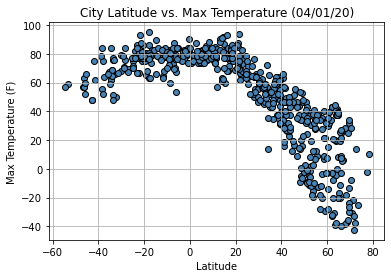

In [80]:
plt.scatter(weather_df["Lat"], weather_df["MaxTemp"], facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('views/Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

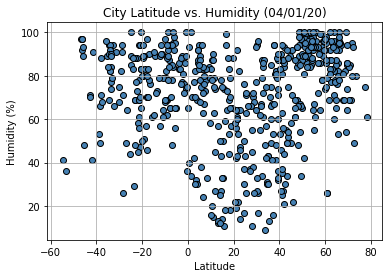

In [81]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('views/Lat_vs_Humidity.png')

## Latitude vs. Cloudiness Plot

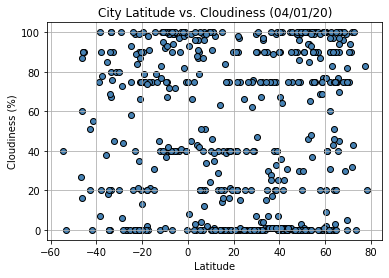

In [82]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('views/Lat_vs_Cloud.png')

## Latitude vs. Wind Speed Plot

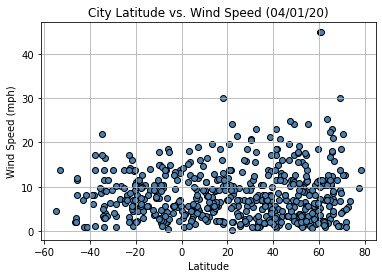

In [83]:
plt.scatter(weather_df["Lat"], weather_df["WindSpeed"], facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('views/Lat_vs_WindSpeed.png')

## Linear Regression

In [112]:
#Negative latitude is south.
southgroup = weather_df.loc[weather_df["Lat"] <= 0]
southgroup

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
9,-6.1761,143.6513,53.15,98,99,2.08,PG,1614714197
10,-46.1927,168.8643,57.00,97,60,1.99,NZ,1614713993
15,-9.3183,-35.5611,82.40,69,75,14.97,BR,1614714200
16,-42.8794,147.3294,48.00,71,20,6.91,AU,1614713999
17,-33.6500,115.3333,66.99,84,67,4.00,AU,1614714002
...,...,...,...,...,...,...,...,...
539,-23.8650,35.3833,77.00,88,20,6.91,MZ,1614714489
540,-29.3353,-49.7269,78.51,82,100,4.14,BR,1614714269
543,-9.1667,-60.6333,76.10,94,93,4.79,BR,1614714368
556,-21.6989,-57.8825,93.34,45,21,5.55,BR,1614714497


In [113]:
northgroup = weather_df.loc[weather_df["Lat"] >= 0]
northgroup

,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,38.5167,-28.7000,55.40,82,75,8.05,PT,1614713989
1,39.1834,-84.5333,44.01,36,1,4.61,US,1614713887
2,22.5667,59.5289,76.06,47,0,8.37,OM,1614714194
3,43.2128,-75.4557,23.00,49,1,20.71,US,1614714111
4,71.2906,-156.7887,-22.00,69,90,12.66,US,1614714001
...,...,...,...,...,...,...,...,...
554,14.3122,121.1114,81.00,78,20,5.75,PH,1614714067
555,65.9939,57.5281,7.29,95,94,8.95,RU,1614714008
558,28.8833,75.9167,64.11,26,0,6.87,IN,1614714498
559,60.3964,-1.3530,35.60,87,20,3.71,GB,1614714129


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8470384552170724


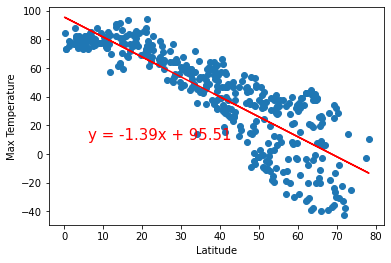

In [114]:
x_values = northgroup["Lat"]
y_values = northgroup["MaxTemp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5686932312551316


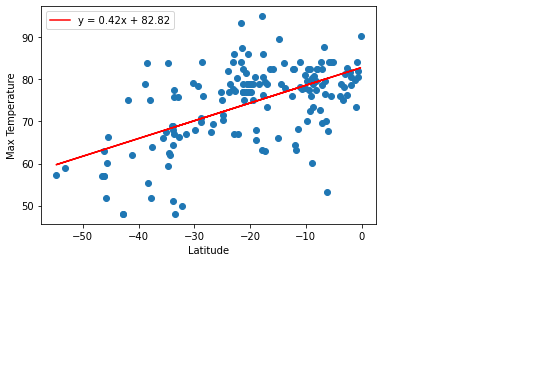

In [135]:
x_values = southgroup["Lat"]
y_values = southgroup["MaxTemp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-", label=line_eq)
plt.legend(loc='best')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3809149433201803


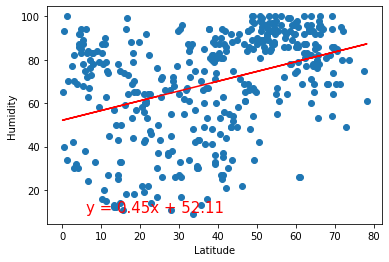

In [103]:
x_values = northgroup["Lat"]
y_values = northgroup["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10602479181641784


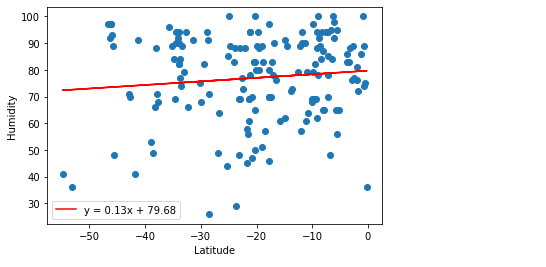

In [132]:
x_values = southgroup["Lat"]
y_values = southgroup["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-", label=line_eq)
plt.legend(loc='best')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1969523373008997


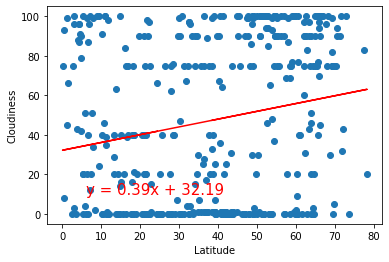

In [120]:
x_values = northgroup["Lat"]
y_values = northgroup["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")WindSpeed
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24357498298334376


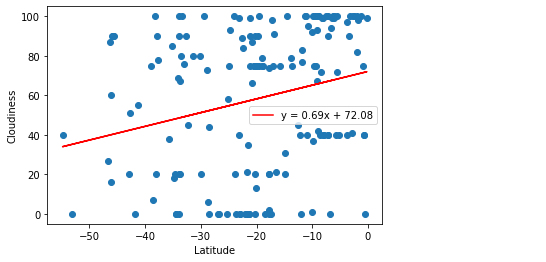

In [133]:
x_values = southgroup["Lat"]
y_values = southgroup["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-", label=line_eq)
plt.legend(loc='best')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06181774408765591


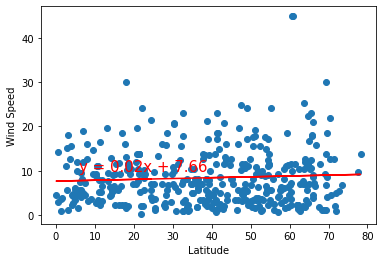

In [121]:
x_values = northgroup["Lat"]
y_values = northgroup["WindSpeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05950348782960193


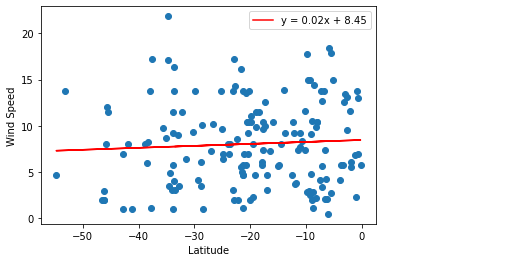

In [134]:
x_values = southgroup["Lat"]
y_values = southgroup["WindSpeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-", label=line_eq)
plt.legend(loc='best')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")